<h1>Partie 1: Importation des biliotheques necessaire pour l'EDA</h1>


Chargement De La Dataset


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:


df = pd.read_csv("../../data/creditcard.csv")
# 5 premiere lignes 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Partie 2 : Analyse De Forme

In [3]:
df.shape #taille de la dataset 

(284807, 31)

In [4]:
# tableau de recapitulatif de la dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#detection des valeurs manquantes 

df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [6]:
# types des variables de la dataset 

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# tableau descriptive  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
#detection des doublons sur la dataset 

df.duplicated().sum()

1081

La dataset comporte 1081 doublons de types numeriques. il sera donc question de supprimer ces doublons. 


In [9]:
# suppression des doublons 
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [ ]:
#calcul de la variance des variables pour detecter les outliers 

variances = df.drop(columns='Class', axis = 1 ).var().sort_values(ascending= False ) 
variances


Time      2.254450e+09
Amount    6.269988e+04
V1        3.794806e+00
V2        2.711631e+00
V3        2.276121e+00
V4        1.999916e+00
V5        1.896152e+00
V6        1.774039e+00
V7        1.507159e+00
V8        1.390169e+00
V9        1.200104e+00
V10       1.158653e+00
V11       1.037791e+00
V13       9.908802e-01
V12       9.893773e-01
V14       9.067136e-01
V15       8.370304e-01
V16       7.633453e-01
V17       7.098186e-01
V18       7.012011e-01
V19       6.615847e-01
V20       5.928757e-01
V22       5.249734e-01
V21       5.240448e-01
V23       3.890047e-01
V24       3.667837e-01
V25       2.716706e-01
V26       2.323750e-01
V27       1.566132e-01
V28       1.076015e-01
dtype: float64

: 

In [ ]:
#Detections des outliers 
importantfeatures = variances.index[:10]

plt.figure(figsize=(15,10))

for i,feature in enumerate(importantfeatures):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f"boxplot de {feature}")

Partie 3: Analyse De Fond 

In [ ]:
# variables principales de la dataset 

print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
class_counts = df['Class'].value_counts()
print(class_counts)

fraud_rate = class_counts[1] / class_counts.sum()
print("Taux de fraude :", fraud_rate)

Text(0.5, 1.0, 'Distribution de la variable cible (class)')

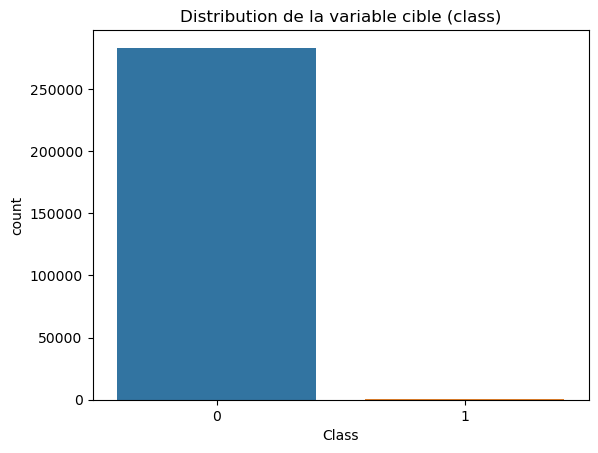

In [ ]:
#distribution de la varible cible (class) et detecter si la dataset est desequilibré ou pas 

sns.countplot(x='Class', data = df )
plt.title("Distribution de la variable cible (class)")

Partie 4 : Distribution Univariés 

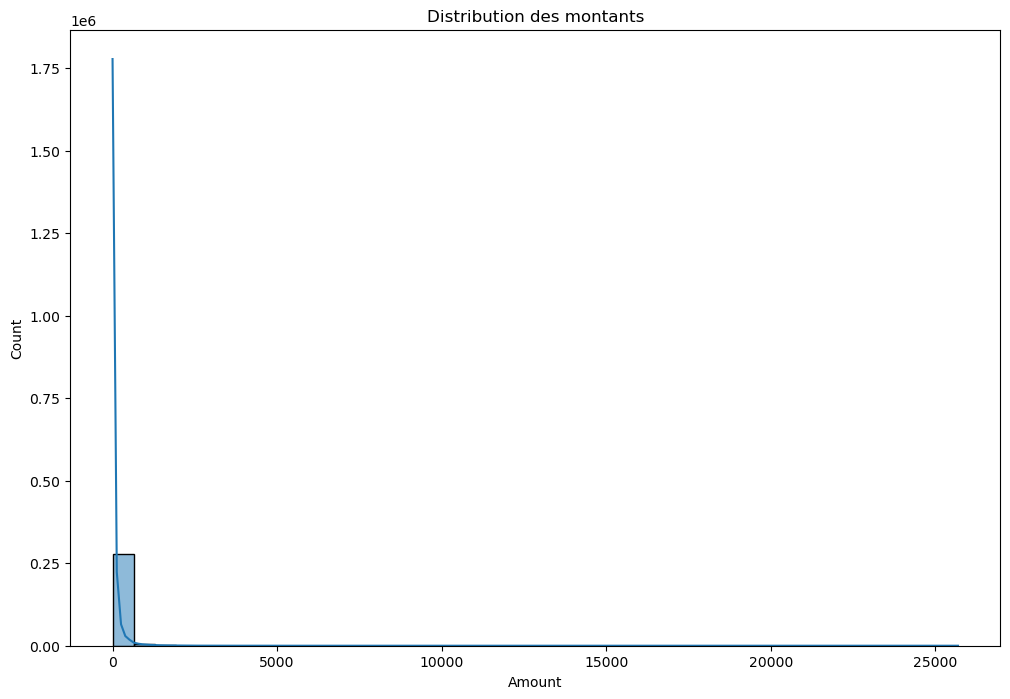

In [ ]:
#histogrammes ou densites des montants 
plt.figure(figsize=(12,8))
sns.histplot(df['Amount'], bins=40, kde=True)
plt.title("Distribution des montants")
df['Amount']
plt.show()


In [ ]:
# Histogrammes des features les plus importantes avec KDE

important_features = variances.index[:8]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature], kde = True)
    plt.title(f'Histogramme de {feature}')
    
plt.tight_layout()
plt.show()

Partie 5 : Correlation et Relations bivariés 

In [ ]:
num_vars = ['Amount', 'Time', 'V1', 'V2', 'V3', 'V4']  # Adaptez
corr_matrix = df[num_vars].corr(method='pearson')  # Ou 'spearman'
print(corr_matrix[1].sort_values(ascending=False))  # Corrélations avec fraude

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation Pearson')
plt.show()

# Test spécifique
r, p = pearsonr(df['Amount'], df['Time'])
print(f"Pearson r={r:.3f}, p-value={p:.3f}")

In [ ]:
# #la matrice de correlation 
# cor = df.corr(numeric_only=True)
# #sns.heatmap(cor, annot=True)
# sns.pairplot(hue='Class', data=df)